<a href="https://colab.research.google.com/github/yudhiesh1997/RedWineQuality/blob/master/LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn 
import seaborn as sns 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [33]:
df = pd.read_csv("/content/drive/My Drive/winequality-red 3.csv")

columns_ = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'quality']
features = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']

In [34]:
df = df[columns_]

In [35]:
df.head()

,alcohol,volatile acidity,sulphates,citric acid,quality
0,9.4,0.70,0.56,0.00,5
1,9.8,0.88,0.68,0.00,5
2,9.8,0.76,0.65,0.04,5
3,9.8,0.28,0.58,0.56,6
4,9.4,0.70,0.56,0.00,5


In [39]:
scaler = StandardScaler()

def scale_features(features, df):
  df[features] = scaler.fit_transform(df[features])

In [40]:
scale_features(features=features, df=df)

In [41]:
df.head()

,alcohol,volatile acidity,sulphates,citric acid,quality
0,-0.960246,0.961877,-0.579207,-1.391472,5
1,-0.584777,1.967442,0.128950,-1.391472,5
2,-0.584777,1.297065,-0.048089,-1.186070,5
3,-0.584777,-1.384443,-0.461180,1.484154,6
4,-0.960246,0.961877,-0.579207,-1.391472,5


In [42]:
from sklearn.model_selection import StratifiedKFold, train_test_split

# Stratified K-fold cross-validation 
df['kfold'] = -1
df = df.sample(frac=1).reset_index(drop=True)
y = df.quality
kf = StratifiedKFold(n_splits=5)

for f, (t_,v_) in enumerate(kf.split(X=df, y=y)):
  df.loc[v_, 'kfold'] = f
  df_train = df.loc[t_]
  df_test = df.loc[v_]

In [43]:
X_train = df_train.drop("quality", axis = 1).values
X_test = df_test.drop("quality", axis = 1).values 
y_train = df_train["quality"].values 
y_test = df_test["quality"].values 

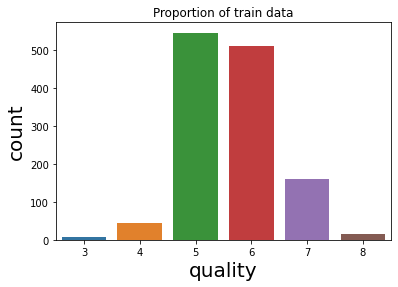

In [44]:
# Split data into k fold = 5
def plot_distribution(df, title):
  b = sns.countplot(x='quality', data=df)
  b.set_xlabel('quality', fontsize=20)
  b.set_ylabel('count', fontsize=20)
  b.set_title(label = title)

plot_distribution(df=df_train, title = "Proportion of train data")


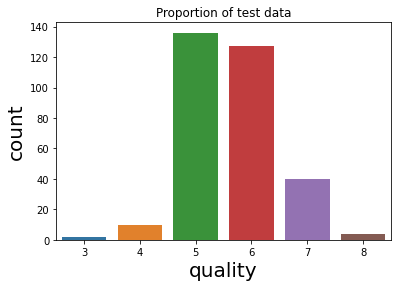

In [45]:
plot_distribution(df=df_test, title = "Proportion of test data")

In [46]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [47]:
from sklearn.linear_model import LogisticRegression

grid={"C":np.logspace(-3,3,7), "solver": ["lbfgs", "liblinear",],"penalty":["l1","l2"], "max_iter": np.arange(100, 1000, 100)}
logreg=LogisticRegression()
scoring = ['roc_auc_ovr', 'f1_weighted', 'accuracy']
logreg.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

In [48]:
logreg_cv = GridSearchCV(estimator=logreg,
                     param_grid=grid,
                     scoring=scoring,
                     cv=5,
                     refit='roc_auc_ovr',
                     n_jobs=-1)
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'max_iter': array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear']},
             pre_dispatch='2*n_jobs', refit='roc_auc_ovr',

In [49]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("roc score :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
roc score : 0.7946075271917128


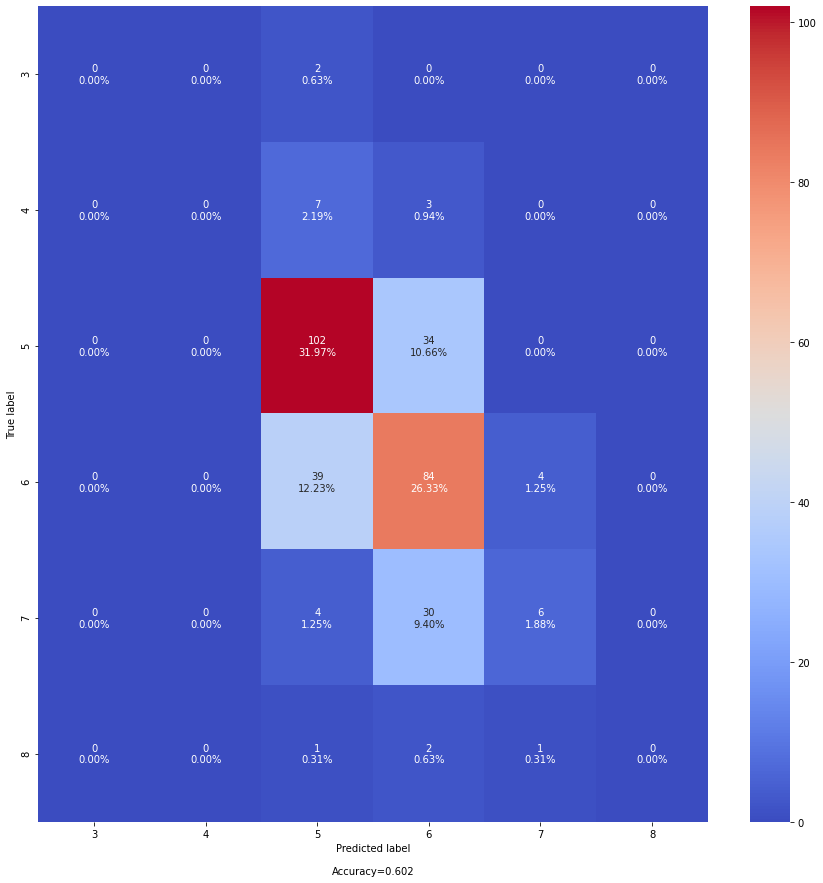

In [50]:
lr_pred = logreg_cv.predict(X_test)
cm = confusion_matrix(y_test, lr_pred)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['3', '4', '5', '6', '7', '8']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='coolwarm',
                      figsize=(15,15))